In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.special import erfc

In [2]:
df = pd.read_csv('../docs 2nd Approach/relative_error.csv')
df = df.apply(lambda x: x.sort_values().values)

list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']
df_melt

df_05v = df['0.5v']
df_9v = df['9v']
df_3v = df['3v']
df_6v = df['6v']
df_18v = df['18v']
df_15v = df['15v']
df_12v = df['12v']
df_21v = df['21v']
df_24_5v = df['24.5v']


In [3]:
def chauvenet(array):
    mean = array.mean()           # Mean of incoming array
    stdv = array.std()            # Standard deviation
    N = len(array)                # Lenght of incoming array
    criterion = 1.0/(2*N)         # Chauvenet's criterion
    d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's
    prob = erfc(d)                # Area normal dist.    
    return prob < criterion       # Use boolean array outside this function ,

# 0.5v

In [4]:
df = {}
count = 0 
while(len(df_05v[chauvenet(df_05v) == True]) != 0 ):
    len_0 = len(df_05v)
    print(df_05v.mean())
    df[f'Iteration - {count}'] = [df_05v.mean(), df_05v.std()]
    df_05v = df_05v.drop(df_05v[chauvenet(df_05v) == True].index)
    df[f'Iteration - {count}'].append(len_0 - len(df_05v))
    df_05v = df_05v.reset_index(drop=True)
    count += 1

df = pd.DataFrame(df, index=['Mean', 'Standard Deviation', 'Outlier'])
df


1.7460000000000013


,Iteration - 0
Mean,1.74600
Standard Deviation,4.68203
Outlier,37.00000


# 3v

In [5]:
df = {}
count = 0 
while(len(df_3v[chauvenet(df_3v) == True]) != 0 ):
    len_0 = len(df_3v)
    print(df_3v.mean())
    df[f'Iteration - {count}'] = [df_3v.mean(), df_3v.std()]
    df_3v = df_3v.drop(df_3v[chauvenet(df_3v) == True].index)
    df[f'Iteration - {count}'].append(len_0 - len(df_3v))
    df_3v = df_3v.reset_index(drop=True)
    count += 1

df = pd.DataFrame(df, index=['Mean', 'Standard Deviation', 'Outlier'])
df


0.8726666666666679
0.8946127946127959
0.9809009009009015


,Iteration - 0,Iteration - 1,Iteration - 2
Mean,0.872667,0.894613,0.980901
Standard Deviation,0.530472,0.483643,0.369919
Outlier,10.000000,65.000000,27.000000


# 6v

In [6]:
df = {}
count = 0 
while(len(df_6v[chauvenet(df_6v) == True]) != 0 ):
    len_0 = len(df_6v)
    print(df_6v.mean())
    df[f'Iteration - {count}'] = [df_6v.mean(), df_6v.std()]
    df_6v = df_6v.drop(df_6v[chauvenet(df_6v) == True].index)
    df[f'Iteration - {count}'].append(len_0 - len(df_6v))
    df_6v = df_6v.reset_index(drop=True)
    count += 1

df = pd.DataFrame(df, index=['Mean', 'Standard Deviation', 'Outlier'])
df


0.008333333333332974
0.01831129196337701


,Iteration - 0,Iteration - 1
Mean,0.008333,0.018311
Standard Deviation,0.281581,0.247991
Outlier,17.000000,53.000000


# 9v

In [7]:
df = {}
count = 0 
while(len(df_9v[chauvenet(df_9v) == True]) != 0 ):
    len_0 = len(df_9v)
    print(df_9v.mean())
    df[f'Iteration - {count}'] = [df_9v.mean(), df_9v.std()]
    df_9v = df_9v.drop(df_9v[chauvenet(df_9v) == True].index)
    df[f'Iteration - {count}'].append(len_0 - len(df_9v))
    df_9v = df_9v.reset_index(drop=True)
    count += 1

df = pd.DataFrame(df, index=['Mean', 'Standard Deviation', 'Outlier'])
df


0.00966666666666643
0.011820330969266893
-0.011265267401873351


,Iteration - 0,Iteration - 1,Iteration - 2
Mean,0.009667,0.011820,-0.011265
Standard Deviation,0.176662,0.160362,0.128678
Outlier,13.000000,50.000000,41.000000


# 12v

In [8]:
df = {}
count = 0 
while(len(df_12v[chauvenet(df_12v) == True]) != 0 ):
    len_0 = len(df_12v)
    print(df_12v.mean())
    df[f'Iteration - {count}'] = [df_12v.mean(), df_12v.std()]
    df_12v = df_12v.drop(df_12v[chauvenet(df_12v) == True].index)
    df[f'Iteration - {count}'].append(len_0 - len(df_12v))
    df_12v = df_12v.reset_index(drop=True)
    count += 1

df = pd.DataFrame(df, index=['Mean', 'Standard Deviation', 'Outlier'])
df


0.00033333333333322913
0.0038798920377866837
0.020346779900919588


,Iteration - 0,Iteration - 1,Iteration - 2
Mean,0.000333,0.003880,0.020347
Standard Deviation,0.147364,0.135405,0.115761
Outlier,12.000000,46.000000,62.000000


# 15v

In [9]:
df = {}
count = 0 
while(len(df_15v[chauvenet(df_15v) == True]) != 0 ):
    len_0 = len(df_15v)
    print(df_15v.mean())
    df[f'Iteration - {count}'] = [df_15v.mean(), df_15v.std()]
    df_15v = df_15v.drop(df_15v[chauvenet(df_15v) == True].index)
    df[f'Iteration - {count}'].append(len_0 - len(df_15v))
    df_15v = df_15v.reset_index(drop=True)
    count += 1

df = pd.DataFrame(df, index=['Mean', 'Standard Deviation', 'Outlier'])
df


-0.014666666666666444
-0.010526315789473445
-0.023446327683615306


,Iteration - 0,Iteration - 1,Iteration - 2
Mean,-0.014667,-0.010526,-0.023446
Standard Deviation,0.119421,0.106596,0.090225
Outlier,12.000000,44.000000,60.000000


# 18v

In [10]:
df = {}
count = 0 
while(len(df_18v[chauvenet(df_18v) == True]) != 0 ):
    len_0 = len(df_18v)
    print(df_18v.mean())
    df[f'Iteration - {count}'] = [df_18v.mean(), df_18v.std()]
    df_18v = df_18v.drop(df_18v[chauvenet(df_18v) == True].index)
    df[f'Iteration - {count}'].append(len_0 - len(df_18v))
    df_18v = df_18v.reset_index(drop=True)
    count += 1

df = pd.DataFrame(df, index=['Mean', 'Standard Deviation', 'Outlier'])
df


0.09827777777778073


,Iteration - 0
Mean,0.098278
Standard Deviation,0.101971
Outlier,10.000000


# 21v

In [11]:
df = {}
count = 0 
while(len(df_21v[chauvenet(df_21v) == True]) != 0 ):
    len_0 = len(df_21v)
    print(df_21v.mean())
    df[f'Iteration - {count}'] = [df_21v.mean(), df_21v.std()]
    df_21v = df_21v.drop(df_21v[chauvenet(df_21v) == True].index)
    df[f'Iteration - {count}'].append(len_0 - len(df_21v))
    df_21v = df_21v.reset_index(drop=True)
    count += 1

df = pd.DataFrame(df, index=['Mean', 'Standard Deviation', 'Outlier'])
df


0.10595238095238221


,Iteration - 0
Mean,0.105952
Standard Deviation,0.094741
Outlier,11.000000


# 24.5v

In [12]:
df = {}
count = 0 
while(len(df_24_5v[chauvenet(df_24_5v) == True]) != 0 ):
    len_0 = len(df_24_5v)
    print(df_24_5v.mean())
    df[f'Iteration - {count}'] = [df_24_5v.mean(), df_24_5v.std()]
    df_24_5v = df_24_5v.drop(df_24_5v[chauvenet(df_24_5v) == True].index)
    df[f'Iteration - {count}'].append(len_0 - len(df_24_5v))
    df_24_5v = df_24_5v.reset_index(drop=True)
    count += 1

df = pd.DataFrame(df, index=['Mean', 'Standard Deviation', 'Outlier'])
df


0.07110204081632582


,Iteration - 0
Mean,0.071102
Standard Deviation,0.072472
Outlier,35.000000


# Single Chauvenet

In [13]:
df_each_chauvenet = pd.concat([
    df_05v,
    df_3v,
    df_6v,
    df_9v,
    df_12v,
    df_15v,
    df_18v,
    df_21v,
    df_24_5v], axis=1)

df_each_chauvenet = df_each_chauvenet.reset_index(drop=True)
df_each_chauvenet = df_each_chauvenet.apply(lambda x: x.sort_values().values)
list_voltage = []
for i in df_each_chauvenet.columns:
    list_voltage.append(str(i))

df_each_chauvenet_melt = pd.melt(
    df_each_chauvenet.reset_index(), id_vars=['index'], value_vars=list_voltage)
df_each_chauvenet_melt = df_each_chauvenet_melt.drop(columns=['index'])
# replace column names
df_each_chauvenet_melt.columns = ['voltage', 'value']
df_each_chauvenet_melt = df_each_chauvenet_melt.dropna()
df_each_chauvenet_melt.to_csv('../docs 2nd Approach/remove_outlier_each_chauvenet.csv', index=False)

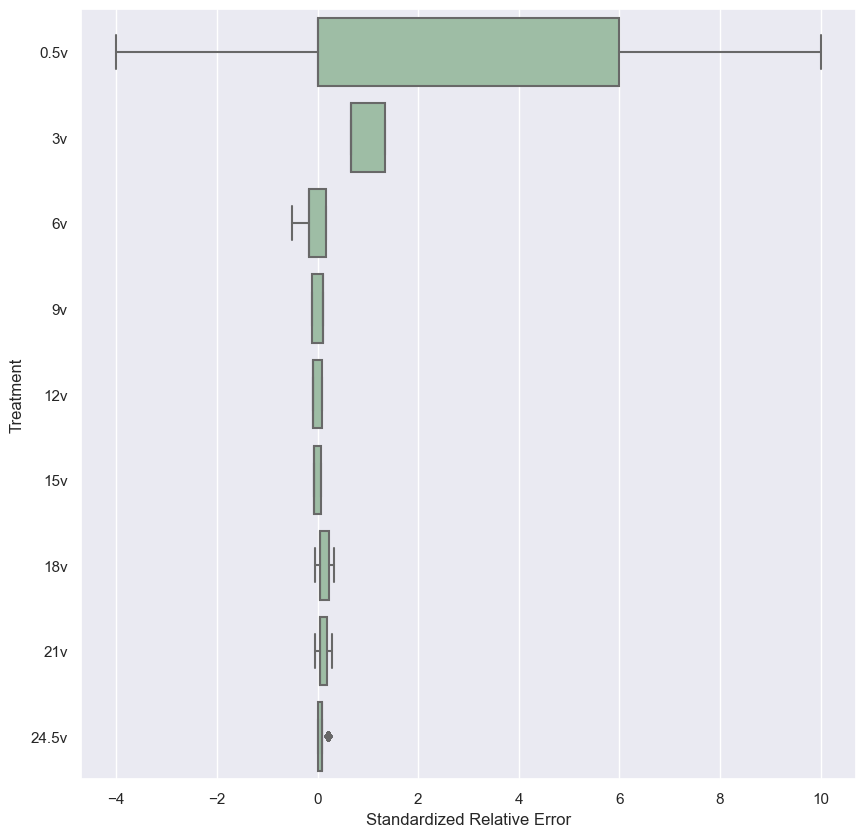

In [14]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('darkgrid')
ax = sns.boxplot(x='value', y='voltage', data=df_each_chauvenet_melt, color='#99c2a2')
ax.set(xlabel='Standardized Relative Error', ylabel='Treatment')
plt.savefig('../docs 2nd Approach/img/Boxplot Remove Outlier Chauvenet Each.png')
plt.show()

# Double Chauvenet

In [15]:
df = {}
df_double_chauvenet = df_each_chauvenet_melt
count = 0 
while(len(df_double_chauvenet[chauvenet(df_double_chauvenet['value']) == True]) != 0 ):
    len_0 = len(df_double_chauvenet)
    print(df_double_chauvenet['value'].mean())
    df[f'Iteration - {count}'] = [df_double_chauvenet['value'].mean(), df_double_chauvenet['value'].std()]
    df_double_chauvenet = df_double_chauvenet.drop(df_double_chauvenet[chauvenet(df_double_chauvenet['value']) == True].index)
    df[f'Iteration - {count}'].append(len_0 - len(df_double_chauvenet))
    df_double_chauvenet = df_double_chauvenet.reset_index(drop=True)
    count += 1

df = pd.DataFrame(df, index=['Mean', 'Standard Deviation', 'Outlier'])
df


0.36054575731424265
0.13948693328130143
0.07921875238796504


,Iteration - 0,Iteration - 1,Iteration - 2
Mean,0.360546,0.139487,0.079219
Standard Deviation,1.441042,0.328872,0.194999
Outlier,446.000000,382.000000,567.000000


In [16]:
df_double_chauvenet.to_csv('../docs 2nd Approach/remove_outlier_double_chauvenet.csv', index=False)


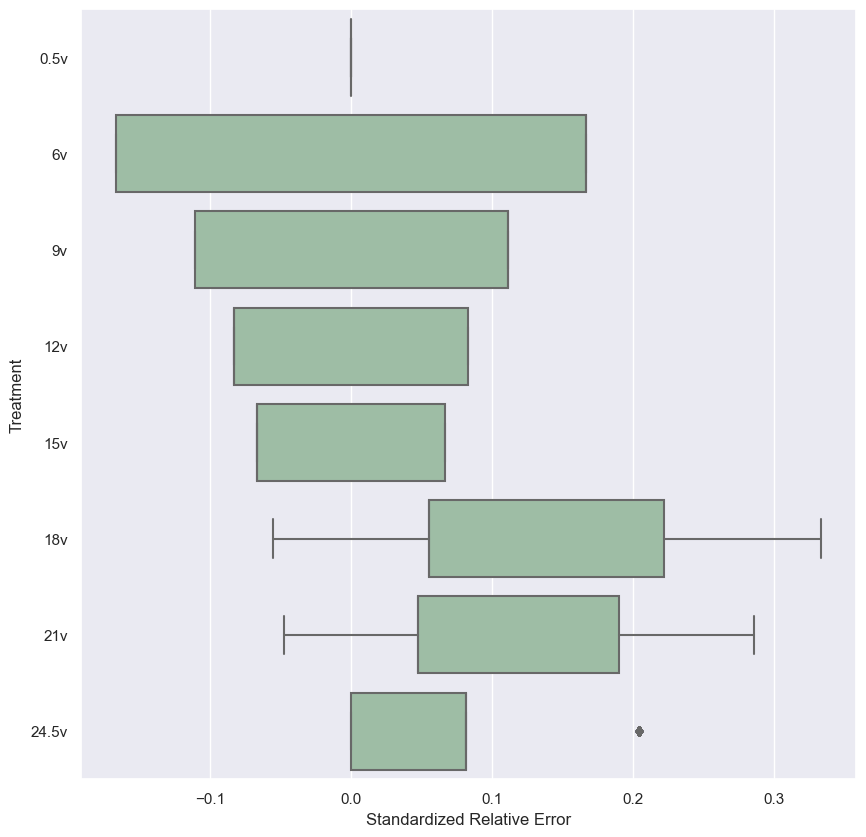

In [17]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('darkgrid')
ax = sns.boxplot(x='value', y='voltage', data=df_double_chauvenet, color='#99c2a2')
ax.set(xlabel='Standardized Relative Error', ylabel='Treatment')
plt.savefig('../docs 2nd Approach/img/Boxplot Remove Outlier Chauvenet Each.png')
plt.show()